In [28]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# %matplotlib inline


In [29]:
# # Load the dataset
# ms_df = pd.read_csv('Microsoft_Stock.csv')
# ms_df['Date'] = pd.to_datetime(ms_df['Date'])
# ms_df = ms_df.sort_values(by='Date')
# ms_df.set_index('Date', inplace=True)
# # Plot the dataset
# plt.figure(figsize=(10, 5))
# plt.plot(ms_df)
# plt.title('Microsoft Stock')
# plt.xlabel('Date')
# plt.show()


In [30]:
# from statsmodels.tsa.stattools import adfuller

# # Check for stationarity
# result = adfuller(ms_df['Open'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

# # Since the p-value is > 0.05, the data is not stationary. We need to difference it.
# ms_data_diff= ms_df.diff().dropna()

# # Check for stationarity again
# result = adfuller(ms_data_diff['Open'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

# # Plot the differenced data
# plt.figure(figsize=(10, 5))
# plt.plot(ms_data_diff)
# plt.title('Differenced Microsoft Stock')
# plt.xlabel('Open')
# plt.show()


In [31]:
# # Fit the ARMA(1, 1) model
# model = ARIMA(ms_data_diff, order=(1, 0, 1))
# model_fit = model.fit()

# # Print the model summary
# print(model_fit.summary())


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
np.random.seed(0)

# Load your temperature dataset with columns "Date" and "Temperature"
ms_df = pd.read_csv('Microsoft_Stock.csv')

# Make sure your "Date" column is in datetime format
ms_df['Date'] = pd.to_datetime(ms_df['Date'])

# Sorting the data by date (if not sorted)
ms_df = ms_df.sort_values(by='Date')

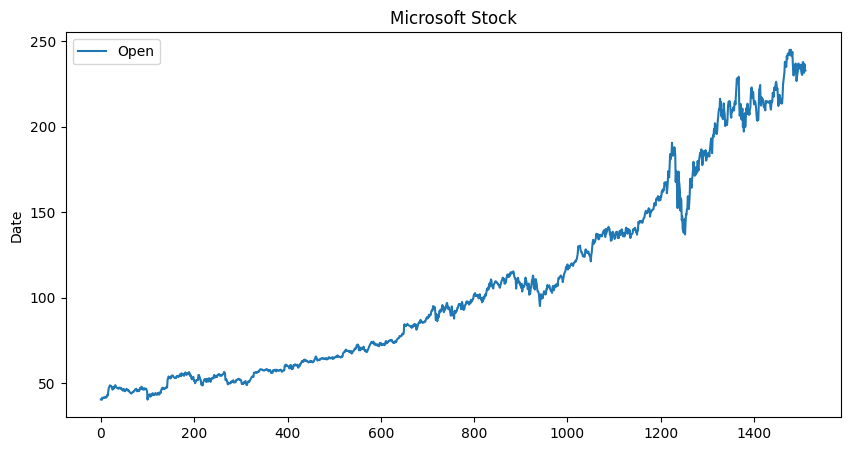

In [39]:
# Visualize the data
plt.figure(figsize=(10, 5))
plt.plot( ms_df['Open'], label='Open')
plt.ylabel('Date')
plt.legend()
plt.title('Microsoft Stock')
plt.show()


In [40]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	ms_df[f'Lag_{i}'] = ms_df['Open'].shift(i)

# Drop rows with NaN values resulting from creating lag features
ms_df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(ms_df))
train_data = ms_df[:train_size]
test_data = ms_df[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['Open']

y_test = test_data['Open']


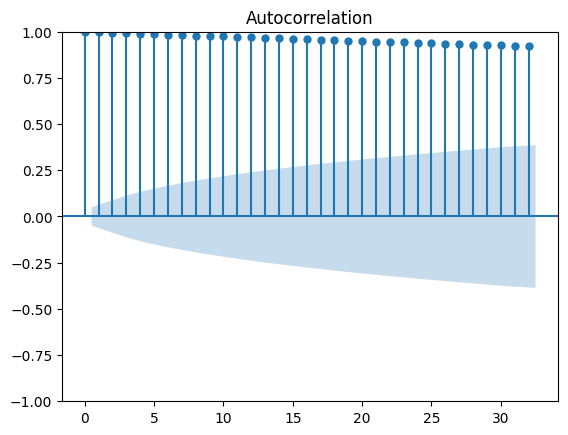

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
series = ms_df['Open']
plot_acf(series)
plt.show()


In [42]:
ms_df['Open'].corr(ms_df['Open'].shift(1))

0.9992709343797572

In [43]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)
 
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 13.66
Root Mean Squared Error: 16.70


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
ms_df

,Date,Open,High,Low,Close,Volume,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
12,2015-04-20 16:00:00,41.73,43.17,41.68,42.91,46057733,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61,40.34,40.66,40.60
13,2015-04-21 16:00:00,43.00,43.15,42.53,42.64,26013844,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61,40.34,40.66
14,2015-04-22 16:00:00,42.67,43.13,42.55,42.99,25064273,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61,40.34
15,2015-04-23 16:00:00,42.85,43.61,42.80,43.34,46309530,42.67,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48,41.61
16,2015-04-24 16:00:00,45.66,48.14,45.65,47.87,130933665,42.85,42.67,43.00,41.73,41.67,41.95,41.76,41.80,41.40,41.63,41.25,41.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00,232.88
1507,2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96,237.00
1508,2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01,234.96
1509,2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012,236.59,231.55,235.30,237.85,237.49,230.27,231.02,232.56,236.15,236.28,234.96,234.01


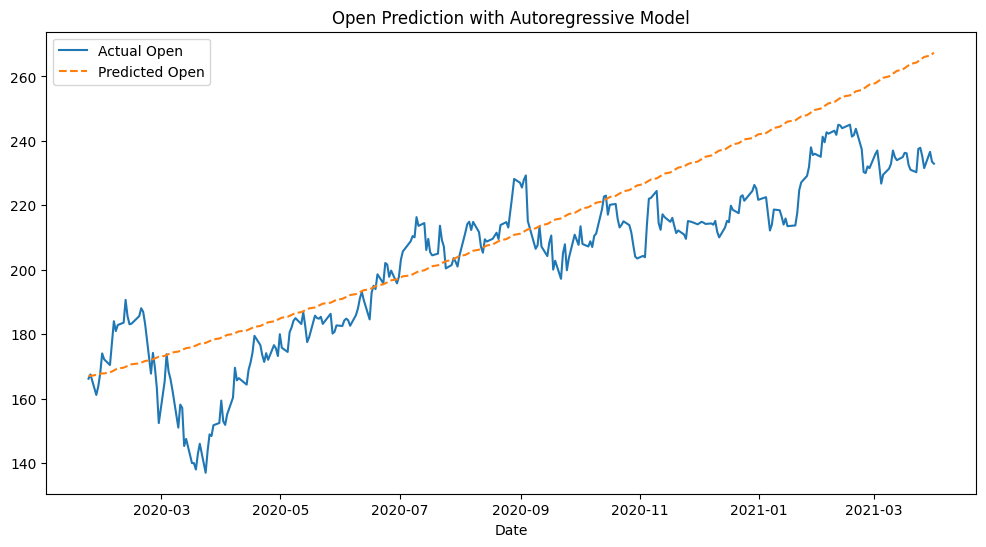

In [47]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data["Date"] ,y_test, label='Actual Open')
plt.plot( test_data["Date"],y_pred, label='Predicted Open', linestyle='--')
plt.xlabel('Date')
plt.legend()
plt.title('Open Prediction with Autoregressive Model')
plt.show()


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


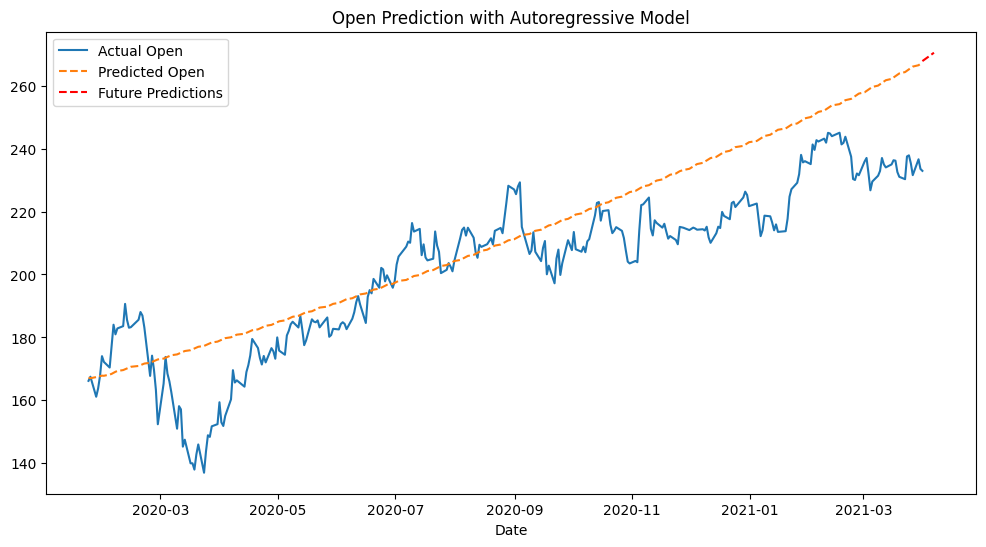

In [49]:
# Define the number of future time steps you want to predict (1 week)
forecast_steps = 7
 
# Extend the predictions into the future for one year
future_indices = range(len(test_data), len(test_data) + forecast_steps)
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) + forecast_steps - 1, dynamic=False)
 
# Create date indices for the future predictions
future_dates = pd.date_range(start=test_data['Date'].iloc[-1], periods=forecast_steps, freq='D')
 
# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test, label='Actual Open')
plt.plot(test_data['Date'], y_pred, label='Predicted Open', linestyle='--')
plt.plot(future_dates, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Date')
plt.legend()
plt.title('Open Prediction with Autoregressive Model')
plt.show()

ADF Statistic: 0.8366570362394014
p-value: 0.9922054205121158
ADF Statistic: -31.64554974882581
p-value: 0.0


TypeError: float() argument must be a string or a real number, not 'Timedelta'

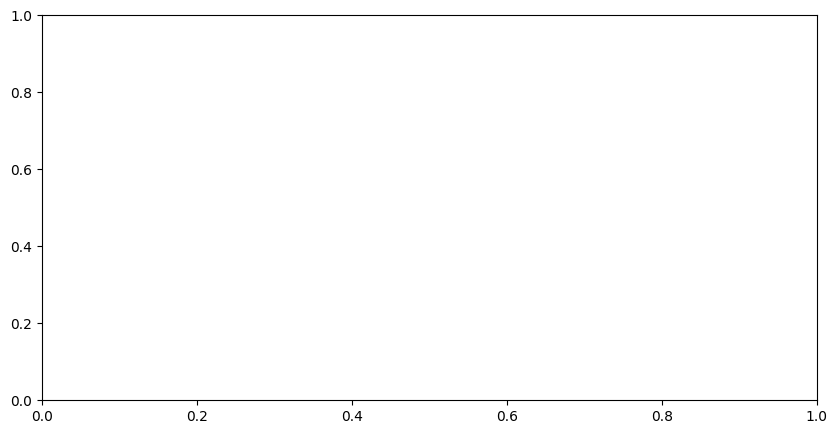

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(ms_df['Open'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
ms_data_diff1 = ms_df.diff().dropna()

# Check for stationarity again
result = adfuller(ms_data_diff1['Open'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(ms_data_diff1)
# plt.title('Differenced Monthly Open Stock')
# plt.xlabel('Date')
# plt.ylabel('Number of Passengers')
plt.show()



In [52]:
# Fit the ARMA(1, 1) model
model = ARIMA(ms_data_diff1, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).